In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot
import seaborn as sns; sns.set()

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import missingno as msno



%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

In [2]:
!pip install missingno

In [3]:
df_total = pd.read_csv("time_series_covid19_confirmed_global.csv")
df_total.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,237,273,281,299,349,367,423,444,484,521
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,259,277,304,333,361,377,383,400,409,416
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,847,986,1171,1251,1320,1423,1468,1572,1666,1761
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,390,428,439,466,501,525,545,564,583,601
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,8,8,8,10,14,16,17,19,19,19


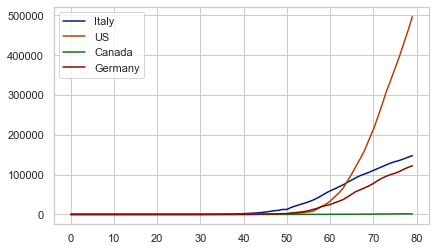

In [4]:
countries=['US', 'Canada', 'Germany']
y=df_total.loc[df_total['Country/Region']=='Italy'].iloc[0,4:]
s = pd.DataFrame({'Italy':y})
for c in countries:    
    #pyplot.plot(range(y.shape[0]),y,'r--')
    s[c] = df_total.loc[df_total['Country/Region']==c].iloc[0,4:]
#pyplot.plot(range(y.shape[0]),y,'g-')
pyplot.plot(range(y.shape[0]), s)
plt.gca().legend(('Italy', 'US', 'Canada', 'Germany'))

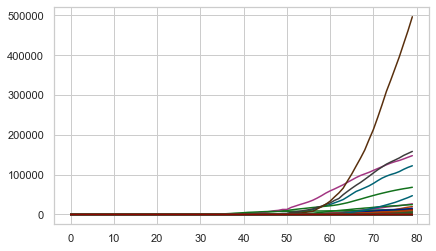

In [5]:
for r in df_total['Country/Region'].unique():
    if r != 'China':
        pyplot.plot(range(len(df_total.columns)-4), df_total.loc[df_total['Country/Region']==r].iloc[0,4:],label=r)
        #pyplot.legend()

In [6]:
df_recovered=  pd.read_csv("time_series_covid19_recovered_global.csv")
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,5,10,10,10,15,18,18,29,32,32
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,67,76,89,99,104,116,131,154,165,182
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,61,61,62,90,90,90,113,237,347,405
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,10,10,16,21,26,31,39,52,58,71
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,2,2


In [7]:
df_deaths=  pd.read_csv("time_series_covid19_deaths_global.csv")
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,4,6,6,7,7,11,14,14,15,15
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,15,16,17,20,20,21,22,22,23,23
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,58,86,105,130,152,173,193,205,235,256
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,14,15,16,17,18,21,22,23,25,26
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [8]:
df_active = pd.DataFrame()

In [9]:
df_active1= df_total.loc[:,'1/22/20': ].subtract(df_deaths.loc[:,'1/22/20': ], axis = 1) 
df_active = df_active1.loc[:,'1/22/20': ].subtract(df_recovered.loc[:,'1/22/20': ], axis = 1)

In [10]:
df_active.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,228.0,257.0,265.0,282.0,327.0,338.0,391.0,401.0,437.0,474.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,177.0,185.0,198.0,214.0,237.0,240.0,230.0,224.0,221.0,211.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,728.0,839.0,1004.0,1031.0,1078.0,1160.0,1162.0,1130.0,1084.0,1100.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,366.0,403.0,407.0,428.0,457.0,473.0,484.0,489.0,500.0,504.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,6.0,10.0,12.0,13.0,15.0,15.0,15.0


In [11]:
df_active.insert(0, 'Province/State', df_total['Province/State'])
df_active.insert(1, 'Country/Region', df_total['Country/Region'])
df_active.insert(2, 'Lat', df_total['Lat'])
df_active.insert(3, 'Long', df_total['Long'])

In [12]:
df_active.head() #Calculating active cases, as we have numbers of confirmed, recovered and death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20
0,NaN,Afghanistan,33.0000,65.0000,0.0,0.0,0.0,0.0,0.0,0.0,...,228.0,257.0,265.0,282.0,327.0,338.0,391.0,401.0,437.0,474.0
1,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,177.0,185.0,198.0,214.0,237.0,240.0,230.0,224.0,221.0,211.0
2,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,728.0,839.0,1004.0,1031.0,1078.0,1160.0,1162.0,1130.0,1084.0,1100.0
3,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,366.0,403.0,407.0,428.0,457.0,473.0,484.0,489.0,500.0,504.0
4,NaN,Angola,-11.2027,17.8739,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,6.0,10.0,12.0,13.0,15.0,15.0,15.0


In [13]:
df_cleaned =  pd.DataFrame()

In [14]:
df_cleaned.insert(0, 'Province/State', df_total['Province/State'])
df_cleaned.insert(1, 'Country/Region', df_total['Country/Region'])
df_cleaned.insert(2, 'Lat', df_total['Lat'])
df_cleaned.insert(3, 'Long', df_total['Long'])

In [15]:
df_cleaned.insert(4, 'Confirmed', df_total['4/10/20'])
df_cleaned.insert(5, 'Active', df_active['4/10/20'])
df_cleaned.insert(6, 'Recovered', df_recovered['4/10/20'])
df_cleaned.insert(7, 'Deaths', df_deaths['4/10/20'])

In [16]:
df_cleaned.head() ##A clearer version of cases sorted by province

,Province/State,Country/Region,Lat,Long,Confirmed,Active,Recovered,Deaths
0,NaN,Afghanistan,33.0000,65.0000,521,474.0,32.0,15
1,NaN,Albania,41.1533,20.1683,416,211.0,182.0,23
2,NaN,Algeria,28.0339,1.6596,1761,1100.0,405.0,256
3,NaN,Andorra,42.5063,1.5218,601,504.0,71.0,26
4,NaN,Angola,-11.2027,17.8739,19,15.0,2.0,2


In [17]:
df = df_cleaned.groupby(['Country/Region']).sum().reset_index()
#df = df.reset_index(drop= True)

In [18]:
df   ##With different countries

,Country/Region,Lat,Long,Confirmed,Active,Recovered,Deaths
0,Afghanistan,33.000000,65.000000,521,474.0,32.0,15
1,Albania,41.153300,20.168300,416,211.0,182.0,23
2,Algeria,28.033900,1.659600,1761,1100.0,405.0,256
3,Andorra,42.506300,1.521800,601,504.0,71.0,26
4,Angola,-11.202700,17.873900,19,15.0,2.0,2
...,...,...,...,...,...,...,...
180,West Bank and Gaza,31.952200,35.233200,267,265.0,0.0,2
181,Western Sahara,24.215500,-12.885800,4,0.0,0.0,0
182,Yemen,15.552727,48.516388,1,0.0,0.0,0
183,Zambia,-15.416700,28.283300,40,13.0,25.0,2


In [19]:
df_final = df.sort_values(by='Confirmed', ascending=False).reset_index(drop=True)

In [20]:
df_final.head(10) ##Top 10 Countries with highest number of cases. Worked on this small dataset

,Country/Region,Lat,Long,Confirmed,Active,Recovered,Deaths
0,US,37.0902,-95.7129,496535,449159.0,28790.0,18586
1,Spain,40.0000,-4.0000,158273,142190.0,2.0,16081
2,Italy,43.0000,12.0000,147577,121611.0,7117.0,18849
3,France,91.3624,59.7192,125931,33512.0,79203.0,13215
4,Germany,51.0000,9.0000,122171,119404.0,0.0,2767
5,China,1083.3367,3684.4197,82941,5003.0,74598.0,3340
6,United Kingdom,270.0299,-482.9247,74605,65029.0,587.0,8974
7,Iran,32.0000,53.0000,68192,63275.0,685.0,4232
8,Turkey,38.9637,35.2433,47029,43600.0,2423.0,1006
9,Belgium,50.8333,4.0000,26667,18080.0,5568.0,3019


In [21]:
df_final.style.background_gradient(cmap='viridis', low=.5, high=0)

,Country/Region,Lat,Long,Confirmed,Active,Recovered,Deaths
0,US,37.0902,-95.7129,496535,449159,28790,18586
1,Spain,40,-4,158273,142190,2,16081
2,Italy,43,12,147577,121611,7117,18849
3,France,91.3624,59.7192,125931,33512,79203,13215
4,Germany,51,9,122171,119404,0,2767
5,China,1083.34,3684.42,82941,5003,74598,3340
6,United Kingdom,270.03,-482.925,74605,65029,587,8974
7,Iran,32,53,68192,63275,685,4232
8,Turkey,38.9637,35.2433,47029,43600,2423,1006
9,Belgium,50.8333,4,26667,18080,5568,3019


In [22]:
def magnify():
    return [dict(selector="th",
                 props=[("font-size", "4pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

In [23]:
cmap = cmap=sns.diverging_palette(10, 250, as_cmap=True)
bigdf = df_final

bigdf.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '1pt'})\
    .set_caption("Hover to magnify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [24]:
df_final.head(10)

,Country/Region,Lat,Long,Confirmed,Active,Recovered,Deaths
0,US,37.0902,-95.7129,496535,449159.0,28790.0,18586
1,Spain,40.0000,-4.0000,158273,142190.0,2.0,16081
2,Italy,43.0000,12.0000,147577,121611.0,7117.0,18849
3,France,91.3624,59.7192,125931,33512.0,79203.0,13215
4,Germany,51.0000,9.0000,122171,119404.0,0.0,2767
5,China,1083.3367,3684.4197,82941,5003.0,74598.0,3340
6,United Kingdom,270.0299,-482.9247,74605,65029.0,587.0,8974
7,Iran,32.0000,53.0000,68192,63275.0,685.0,4232
8,Turkey,38.9637,35.2433,47029,43600.0,2423.0,1006
9,Belgium,50.8333,4.0000,26667,18080.0,5568.0,3019


In [30]:
import plotly as py
#py.init_notebook_mode(connected=True)
import plotly.graph_objects as go
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)  

In [31]:
!pip install plotly

In [32]:
res = [*(range(len(df_total.columns)-4))] 

In [33]:
total_sum_column = pd.DataFrame(columns=['Confirmed', 'Recovered'])

In [34]:
total_sum_column['Confirmed'] =  df_total.sum(axis=0)
total_sum_column['Recovered'] =  df_recovered.sum(axis=0)

In [35]:
total_sum_column = total_sum_column[2:]

In [36]:
total_sum_column

,Confirmed,Recovered
1/22/20,555.0,28.0
1/23/20,654.0,30.0
1/24/20,941.0,36.0
1/25/20,1434.0,39.0
1/26/20,2118.0,52.0
...,...,...
4/6/20,1345101.0,276515.0
4/7/20,1426096.0,300054.0
4/8/20,1511104.0,328661.0
4/9/20,1595350.0,353975.0


In [37]:
import plotly.graph_objects as go

In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(
                x = res,
                y = total_sum_column['Confirmed'],
                name="Confirmed"))

fig.add_trace(go.Scatter(
                x = res,
                y=total_sum_column['Recovered'],
                name="Recovered"))
                

fig.update_layout(title_text='Time Series with Rangeslider varying with number of days starting from 22 Jan,2020',
                  xaxis_rangeslider_visible=True)
py.offline.iplot(fig)

In [39]:
import plotly.offline as py

In [40]:
Countries = np.unique(df_final['Country/Region'])

In [41]:
cases = []
for country in Countries:
    cases.append(df_final[df_final['Country/Region'] == country]['Confirmed'].sum())

In [42]:
data = [ dict(
        type = 'choropleth',
        locations = Countries,
        z = cases,
        locationmode = 'country names',
        text = Countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'World map')
            )
       ]

In [43]:
layout = dict(
    title = 'COVID-19 Confirmed Cases with countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(3, 186, 252)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

In [44]:
fig = dict(data=data, layout=layout)

In [45]:
py.iplot(fig, validate=False, filename='worldmap')

In [46]:
df1=df_final[['Country/Region','Confirmed']]

In [47]:
df1

,Country/Region,Confirmed
0,US,496535
1,Spain,158273
2,Italy,147577
3,France,125931
4,Germany,122171
...,...,...
180,Western Sahara,4
181,Burundi,3
182,Timor-Leste,2
183,Papua New Guinea,2


In [48]:
Temp = pd.read_csv('GlobalLandTemperaturesByCountry.csv')##Average land surface temperatures from wikipedia

In [49]:
Temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [50]:
Temp_clean = Temp[~Temp['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

Temp_clean = Temp_clean.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

In [51]:
countries = np.unique(Temp_clean['Country'])
Avg_temp = []
for country in countries:
    Avg_temp.append(Temp_clean[Temp_clean['Country'] == country]['AverageTemperature'].mean())

In [52]:
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = Avg_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Average Temp')
            )
       ]


In [53]:
layout = dict(
    title = 'Average Land Temperatures of Different Countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(3, 198, 252)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

In [54]:
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

In [55]:
#List of average temperatures in April, to be included as new column 
country = ['US', 'Spian', 'Italy','France', 'Germany', 'China','United Kingdom','Iran', 'Turkey', 'Belgium']
degree = [12.1, 12.9, 12.2, 11.4 , 10,  14.8, 8.7, 17,11.1, 9.8]

In [56]:
Visual = df_final.head(10)

In [57]:
Visual['Avg Temp'] = degree

C:\Users\Gurleen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [58]:
Visual

,Country/Region,Lat,Long,Confirmed,Active,Recovered,Deaths,Avg Temp
0,US,37.0902,-95.7129,496535,449159.0,28790.0,18586,12.1
1,Spain,40.0000,-4.0000,158273,142190.0,2.0,16081,12.9
2,Italy,43.0000,12.0000,147577,121611.0,7117.0,18849,12.2
3,France,91.3624,59.7192,125931,33512.0,79203.0,13215,11.4
4,Germany,51.0000,9.0000,122171,119404.0,0.0,2767,10.0
5,China,1083.3367,3684.4197,82941,5003.0,74598.0,3340,14.8
6,United Kingdom,270.0299,-482.9247,74605,65029.0,587.0,8974,8.7
7,Iran,32.0000,53.0000,68192,63275.0,685.0,4232,17.0
8,Turkey,38.9637,35.2433,47029,43600.0,2423.0,1006,11.1
9,Belgium,50.8333,4.0000,26667,18080.0,5568.0,3019,9.8


C:\Users\Gurleen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



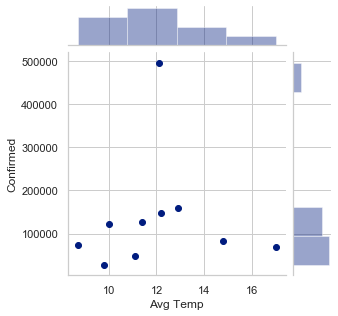

In [59]:
sns.jointplot(x="Avg Temp", y="Confirmed", data=Visual, size=4.5)

C:\Users\Gurleen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



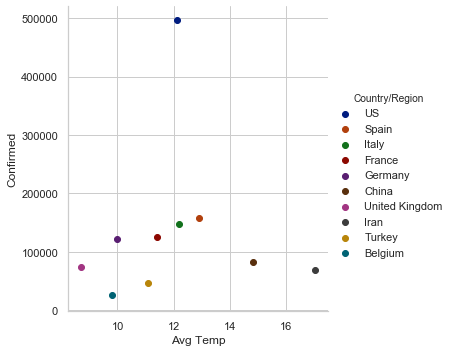

In [54]:
sns.FacetGrid(Visual, hue="Country/Region", size=5) \
   .map(plt.scatter, "Avg Temp", "Confirmed") \
   .add_legend()

## Analysis

From the range slider graph, it is observed that number of recovered cases increased steeply after 60 days, where as confirmed cases increased steeply after 50 days. <br>
The spread of the virus is much less in tropical regions as compared to the temperate zones of the earth. China comes under sub-tropical zone whereas USA comes under temperate zone where the virus is spreading the maximum. <br>
Top 10 highest cases were plotted with the average temperature of the respective countries. It was observed that countries with average temperature from 12-14 degree celsius recorded highest number of COVID-19 cases. The spread of the virus is maximum in these countries. As the temperature decreases below 12, spread of the virus decreases. The same applies when the average temperature of the surface increases after 14 degree celsius.

**Sources** <br>
https://www.kaggle.com/amelinvladislav/map-of-temperatures-and-analysis-of-global-warming<br>
https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html<br>
https://www.kaggle.com/sixteenpython/covid-19-temperature-air-travel-transmission/data<br>
https://en.wikipedia.org/wiki/List_of_cities_by_average_temperature